## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)   

Epoch 49/50
196/196 [==============================] - 5s 23ms/step - loss: 2.4656 - accuracy: 0.0983 - val_loss: 2.4656 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 4s 23ms/step - loss: 2.4656 - accuracy: 0.0980 - val_loss: 2.4655 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________________________________

Epoch 47/50
196/196 [==============================] - 5s 24ms/step - loss: 2.8993 - accuracy: 0.6420 - val_loss: 3.5866 - val_accuracy: 0.4443
Epoch 48/50
196/196 [==============================] - 5s 24ms/step - loss: 2.8646 - accuracy: 0.6426 - val_loss: 3.2398 - val_accuracy: 0.5202
Epoch 49/50
196/196 [==============================] - 5s 23ms/step - loss: 2.8236 - accuracy: 0.6456 - val_loss: 3.1524 - val_accuracy: 0.5356
Epoch 50/50
196/196 [==============================] - 5s 24ms/step - loss: 2.7828 - accuracy: 0.6480 - val_loss: 3.1359 - val_accuracy: 0.5363
Experiment with Regulizer = 0.000000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________

Epoch 45/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8539 - accuracy: 0.6952 - val_loss: 1.5766 - val_accuracy: 0.5038
Epoch 46/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8407 - accuracy: 0.7014 - val_loss: 1.4787 - val_accuracy: 0.5282
Epoch 47/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8221 - accuracy: 0.7078 - val_loss: 1.6171 - val_accuracy: 0.5085
Epoch 48/50
196/196 [==============================] - 5s 24ms/step - loss: 0.8101 - accuracy: 0.7099 - val_loss: 1.5155 - val_accuracy: 0.5197
Epoch 49/50
196/196 [==============================] - 5s 24ms/step - loss: 0.7886 - accuracy: 0.7196 - val_loss: 1.5062 - val_accuracy: 0.5273
Epoch 50/50
196/196 [==============================] - 4s 23ms/step - loss: 0.7760 - accuracy: 0.7228 - val_loss: 1.5629 - val_accuracy: 0.5207
Experiment with Regulizer = 0.000000
Model: "functional_1"
_________________________________________________________________
Layer (type

Epoch 43/50
196/196 [==============================] - 4s 22ms/step - loss: 0.8644 - accuracy: 0.6922 - val_loss: 1.4903 - val_accuracy: 0.5240
Epoch 44/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8508 - accuracy: 0.6966 - val_loss: 1.4623 - val_accuracy: 0.5244
Epoch 45/50
196/196 [==============================] - 4s 22ms/step - loss: 0.8348 - accuracy: 0.7037 - val_loss: 1.4238 - val_accuracy: 0.5431
Epoch 46/50
196/196 [==============================] - 4s 23ms/step - loss: 0.8196 - accuracy: 0.7072 - val_loss: 1.4462 - val_accuracy: 0.5310
Epoch 47/50
196/196 [==============================] - 4s 22ms/step - loss: 0.7981 - accuracy: 0.7171 - val_loss: 1.5000 - val_accuracy: 0.5280
Epoch 48/50
196/196 [==============================] - 4s 23ms/step - loss: 0.7856 - accuracy: 0.7209 - val_loss: 1.6393 - val_accuracy: 0.4981
Epoch 49/50
196/196 [==============================] - 4s 23ms/step - loss: 0.7779 - accuracy: 0.7217 - val_loss: 1.5333 - val_accuracy:

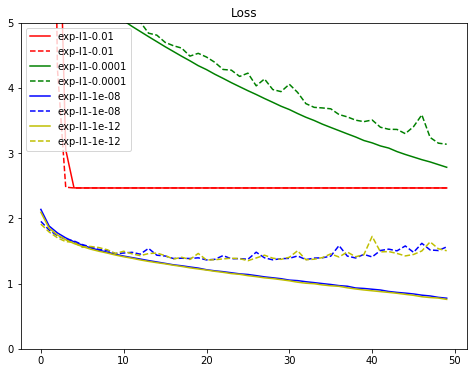

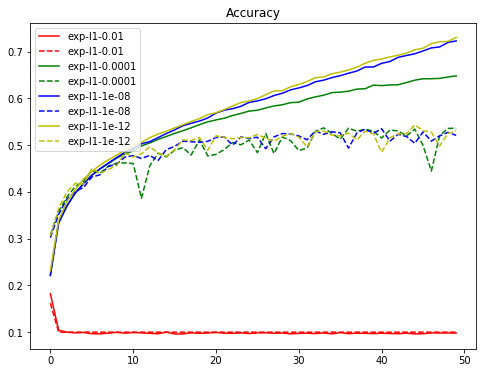

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
def build_mlp_l12(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=(l1_ratio),l2=(l2_ratio)))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=(l1_ratio),l2=(l2_ratio)))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio_l1 in L1_EXP:
    for regulizer_ratio_l2 in L2_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Regulizer = %.6f" % (regulizer_ratio_l1))
        model = build_mlp_l12(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio_l1, l2_ratio=regulizer_ratio_l2)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]
    
        exp_name_tag = "exp-l1-%s" % str(regulizer_ratio_l1)
        results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)   

Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4644 - accuracy: 0.0974 - val_loss: 2.4642 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4644 - accuracy: 0.0984 - val_loss: 2.4643 - val_accuracy: 0.1000
Experiment with Regulizer = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
___________________________________________________________

Epoch 47/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4656 - accuracy: 0.0983 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4656 - accuracy: 0.0983 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4656 - accuracy: 0.0964 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 26ms/step - loss: 2.4656 - accuracy: 0.0993 - val_loss: 2.4655 - val_accuracy: 0.1000
Experiment with Regulizer = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________

Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0964 - val_loss: 2.4654 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0985 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.1000 - val_loss: 2.4654 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 28ms/step - loss: 2.4656 - accuracy: 0.0980 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 2.4656 - accuracy: 0.0969 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0984 - val_loss: 2.4656 - val_accuracy: 0.1000
Experiment with Regulizer = 0.010000
Model: "functional_1"
_________________________________________________________________
Layer (type

Epoch 43/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0976 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 44/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0980 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0975 - val_loss: 2.4656 - val_accuracy: 0.1000
Epoch 46/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0976 - val_loss: 2.4654 - val_accuracy: 0.1000
Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0965 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 5s 27ms/step - loss: 2.4656 - accuracy: 0.0973 - val_loss: 2.4655 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 5s 28ms/step - loss: 2.4656 - accuracy: 0.0963 - val_loss: 2.4655 - val_accuracy:

Epoch 41/50
196/196 [==============================] - 5s 27ms/step - loss: 1.9213 - accuracy: 0.4517 - val_loss: 1.9355 - val_accuracy: 0.4480
Epoch 42/50
196/196 [==============================] - 5s 28ms/step - loss: 1.9118 - accuracy: 0.4549 - val_loss: 1.9840 - val_accuracy: 0.4338
Epoch 43/50
196/196 [==============================] - 5s 27ms/step - loss: 1.9063 - accuracy: 0.4571 - val_loss: 2.0336 - val_accuracy: 0.4195
Epoch 44/50
196/196 [==============================] - 5s 27ms/step - loss: 1.9005 - accuracy: 0.4583 - val_loss: 1.9487 - val_accuracy: 0.4504
Epoch 45/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8958 - accuracy: 0.4587 - val_loss: 1.9341 - val_accuracy: 0.4467
Epoch 46/50
196/196 [==============================] - 5s 28ms/step - loss: 1.8892 - accuracy: 0.4619 - val_loss: 1.9382 - val_accuracy: 0.4518
Epoch 47/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8919 - accuracy: 0.4588 - val_loss: 1.9713 - val_accuracy:

Epoch 39/50
196/196 [==============================] - 6s 29ms/step - loss: 3.2515 - accuracy: 0.6191 - val_loss: 3.4989 - val_accuracy: 0.5329
Epoch 40/50
196/196 [==============================] - 5s 27ms/step - loss: 3.2079 - accuracy: 0.6200 - val_loss: 3.4588 - val_accuracy: 0.5372
Epoch 41/50
196/196 [==============================] - 5s 27ms/step - loss: 3.1576 - accuracy: 0.6232 - val_loss: 3.4997 - val_accuracy: 0.5113
Epoch 42/50
196/196 [==============================] - 5s 27ms/step - loss: 3.1116 - accuracy: 0.6243 - val_loss: 3.4288 - val_accuracy: 0.5200
Epoch 43/50
196/196 [==============================] - 6s 28ms/step - loss: 3.0696 - accuracy: 0.6240 - val_loss: 3.4419 - val_accuracy: 0.5074
Epoch 44/50
196/196 [==============================] - 5s 27ms/step - loss: 3.0196 - accuracy: 0.6289 - val_loss: 3.2792 - val_accuracy: 0.5425
Epoch 45/50
196/196 [==============================] - 5s 28ms/step - loss: 2.9730 - accuracy: 0.6334 - val_loss: 3.3713 - val_accuracy:

Epoch 37/50
196/196 [==============================] - 5s 27ms/step - loss: 3.3427 - accuracy: 0.6176 - val_loss: 3.6080 - val_accuracy: 0.5287
Epoch 38/50
196/196 [==============================] - 5s 27ms/step - loss: 3.2959 - accuracy: 0.6216 - val_loss: 3.5913 - val_accuracy: 0.5172
Epoch 39/50
196/196 [==============================] - 5s 27ms/step - loss: 3.2441 - accuracy: 0.6240 - val_loss: 3.6880 - val_accuracy: 0.4909
Epoch 40/50
196/196 [==============================] - 5s 27ms/step - loss: 3.2027 - accuracy: 0.6276 - val_loss: 3.6572 - val_accuracy: 0.4924
Epoch 41/50
196/196 [==============================] - 5s 27ms/step - loss: 3.1513 - accuracy: 0.6304 - val_loss: 3.5273 - val_accuracy: 0.5144
Epoch 42/50
196/196 [==============================] - 5s 28ms/step - loss: 3.1063 - accuracy: 0.6325 - val_loss: 3.3733 - val_accuracy: 0.5406
Epoch 43/50
196/196 [==============================] - 6s 29ms/step - loss: 3.0612 - accuracy: 0.6358 - val_loss: 3.4189 - val_accuracy:

Epoch 35/50
196/196 [==============================] - 5s 27ms/step - loss: 3.4567 - accuracy: 0.6060 - val_loss: 3.6886 - val_accuracy: 0.5256
Epoch 36/50
196/196 [==============================] - 5s 27ms/step - loss: 3.4022 - accuracy: 0.6107 - val_loss: 3.8350 - val_accuracy: 0.4719
Epoch 37/50
196/196 [==============================] - 5s 27ms/step - loss: 3.3526 - accuracy: 0.6134 - val_loss: 3.6025 - val_accuracy: 0.5233
Epoch 38/50
196/196 [==============================] - 5s 27ms/step - loss: 3.3034 - accuracy: 0.6133 - val_loss: 3.6413 - val_accuracy: 0.4933
Epoch 39/50
196/196 [==============================] - 5s 27ms/step - loss: 3.2589 - accuracy: 0.6181 - val_loss: 3.5454 - val_accuracy: 0.5136
Epoch 40/50
196/196 [==============================] - 5s 27ms/step - loss: 3.2118 - accuracy: 0.6230 - val_loss: 3.5157 - val_accuracy: 0.5219
Epoch 41/50
196/196 [==============================] - 5s 27ms/step - loss: 3.1632 - accuracy: 0.6238 - val_loss: 3.5441 - val_accuracy:

Epoch 33/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8775 - accuracy: 0.4751 - val_loss: 1.9093 - val_accuracy: 0.4606
Epoch 34/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8595 - accuracy: 0.4763 - val_loss: 1.8842 - val_accuracy: 0.4736
Epoch 35/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8476 - accuracy: 0.4789 - val_loss: 1.9293 - val_accuracy: 0.4451
Epoch 36/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8323 - accuracy: 0.4813 - val_loss: 1.9647 - val_accuracy: 0.4293
Epoch 37/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8204 - accuracy: 0.4816 - val_loss: 1.9018 - val_accuracy: 0.4510
Epoch 38/50
196/196 [==============================] - 5s 27ms/step - loss: 1.8107 - accuracy: 0.4815 - val_loss: 1.8518 - val_accuracy: 0.4634
Epoch 39/50
196/196 [==============================] - 5s 27ms/step - loss: 1.7959 - accuracy: 0.4838 - val_loss: 1.8508 - val_accuracy:

Epoch 31/50
196/196 [==============================] - 5s 28ms/step - loss: 1.2302 - accuracy: 0.6209 - val_loss: 1.5171 - val_accuracy: 0.5293
Epoch 32/50
196/196 [==============================] - 5s 27ms/step - loss: 1.2164 - accuracy: 0.6254 - val_loss: 1.5422 - val_accuracy: 0.5243
Epoch 33/50
196/196 [==============================] - 6s 28ms/step - loss: 1.2033 - accuracy: 0.6302 - val_loss: 1.5215 - val_accuracy: 0.5344
Epoch 34/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1846 - accuracy: 0.6383 - val_loss: 1.5393 - val_accuracy: 0.5274
Epoch 35/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1677 - accuracy: 0.6425 - val_loss: 1.5987 - val_accuracy: 0.5112
Epoch 36/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1556 - accuracy: 0.6476 - val_loss: 1.6795 - val_accuracy: 0.5020
Epoch 37/50
196/196 [==============================] - 5s 28ms/step - loss: 1.1495 - accuracy: 0.6507 - val_loss: 1.6228 - val_accuracy:

Epoch 29/50
196/196 [==============================] - 5s 28ms/step - loss: 1.0785 - accuracy: 0.6176 - val_loss: 1.3499 - val_accuracy: 0.5316
Epoch 30/50
196/196 [==============================] - 5s 28ms/step - loss: 1.0578 - accuracy: 0.6220 - val_loss: 1.4617 - val_accuracy: 0.5108
Epoch 31/50
196/196 [==============================] - 5s 27ms/step - loss: 1.0454 - accuracy: 0.6269 - val_loss: 1.5320 - val_accuracy: 0.4927
Epoch 32/50
196/196 [==============================] - 5s 28ms/step - loss: 1.0246 - accuracy: 0.6331 - val_loss: 1.4484 - val_accuracy: 0.5046
Epoch 33/50
196/196 [==============================] - 5s 28ms/step - loss: 1.0181 - accuracy: 0.6372 - val_loss: 1.4110 - val_accuracy: 0.5198
Epoch 34/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9932 - accuracy: 0.6470 - val_loss: 1.3916 - val_accuracy: 0.5239
Epoch 35/50
196/196 [==============================] - 5s 28ms/step - loss: 0.9792 - accuracy: 0.6516 - val_loss: 1.4823 - val_accuracy:

Epoch 27/50
196/196 [==============================] - 6s 29ms/step - loss: 1.1095 - accuracy: 0.6057 - val_loss: 1.4169 - val_accuracy: 0.4996
Epoch 28/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0981 - accuracy: 0.6095 - val_loss: 1.3886 - val_accuracy: 0.5166
Epoch 29/50
196/196 [==============================] - 7s 34ms/step - loss: 1.0772 - accuracy: 0.6164 - val_loss: 1.4366 - val_accuracy: 0.5041
Epoch 30/50
196/196 [==============================] - 7s 36ms/step - loss: 1.0618 - accuracy: 0.6220 - val_loss: 1.3764 - val_accuracy: 0.5215
Epoch 31/50
196/196 [==============================] - 6s 30ms/step - loss: 1.0480 - accuracy: 0.6293 - val_loss: 1.3415 - val_accuracy: 0.5307
Epoch 32/50
196/196 [==============================] - 6s 29ms/step - loss: 1.0324 - accuracy: 0.6301 - val_loss: 1.4098 - val_accuracy: 0.5193
Epoch 33/50
196/196 [==============================] - 6s 31ms/step - loss: 1.0158 - accuracy: 0.6381 - val_loss: 1.4255 - val_accuracy:

Epoch 25/50
196/196 [==============================] - 6s 30ms/step - loss: 2.1664 - accuracy: 0.4517 - val_loss: 2.1844 - val_accuracy: 0.4398
Epoch 26/50
196/196 [==============================] - 6s 30ms/step - loss: 2.1117 - accuracy: 0.4568 - val_loss: 2.1093 - val_accuracy: 0.4478
Epoch 27/50
196/196 [==============================] - 6s 30ms/step - loss: 2.0629 - accuracy: 0.4597 - val_loss: 2.0626 - val_accuracy: 0.4541
Epoch 28/50
196/196 [==============================] - 6s 30ms/step - loss: 2.0210 - accuracy: 0.4611 - val_loss: 2.0264 - val_accuracy: 0.4562
Epoch 29/50
196/196 [==============================] - 6s 30ms/step - loss: 1.9872 - accuracy: 0.4615 - val_loss: 2.0089 - val_accuracy: 0.4526
Epoch 30/50
196/196 [==============================] - 6s 30ms/step - loss: 1.9569 - accuracy: 0.4646 - val_loss: 2.0259 - val_accuracy: 0.4274
Epoch 31/50
196/196 [==============================] - 6s 30ms/step - loss: 1.9296 - accuracy: 0.4662 - val_loss: 1.9566 - val_accuracy:

Epoch 23/50
196/196 [==============================] - 6s 30ms/step - loss: 1.3294 - accuracy: 0.5838 - val_loss: 1.6468 - val_accuracy: 0.4865
Epoch 24/50
196/196 [==============================] - 6s 29ms/step - loss: 1.3136 - accuracy: 0.5921 - val_loss: 1.5103 - val_accuracy: 0.5210
Epoch 25/50
196/196 [==============================] - 6s 29ms/step - loss: 1.2937 - accuracy: 0.5981 - val_loss: 1.5364 - val_accuracy: 0.5169
Epoch 26/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2777 - accuracy: 0.6033 - val_loss: 1.5731 - val_accuracy: 0.5019
Epoch 27/50
196/196 [==============================] - 6s 29ms/step - loss: 1.2615 - accuracy: 0.6086 - val_loss: 1.5502 - val_accuracy: 0.5134
Epoch 28/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2462 - accuracy: 0.6132 - val_loss: 1.5231 - val_accuracy: 0.5268
Epoch 29/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2235 - accuracy: 0.6241 - val_loss: 1.6079 - val_accuracy:

Epoch 21/50
196/196 [==============================] - 6s 30ms/step - loss: 1.2029 - accuracy: 0.5721 - val_loss: 1.4881 - val_accuracy: 0.4866
Epoch 22/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1831 - accuracy: 0.5798 - val_loss: 1.3699 - val_accuracy: 0.5157
Epoch 23/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1688 - accuracy: 0.5856 - val_loss: 1.3601 - val_accuracy: 0.5225
Epoch 24/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1492 - accuracy: 0.5913 - val_loss: 1.3752 - val_accuracy: 0.5207
Epoch 25/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1331 - accuracy: 0.5983 - val_loss: 1.4351 - val_accuracy: 0.4954
Epoch 26/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1168 - accuracy: 0.6015 - val_loss: 1.3901 - val_accuracy: 0.5147
Epoch 27/50
196/196 [==============================] - 6s 30ms/step - loss: 1.1020 - accuracy: 0.6075 - val_loss: 1.4263 - val_accuracy:

Epoch 19/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2339 - accuracy: 0.5607 - val_loss: 1.4390 - val_accuracy: 0.4860
Epoch 20/50
196/196 [==============================] - 6s 31ms/step - loss: 1.2131 - accuracy: 0.5688 - val_loss: 1.3947 - val_accuracy: 0.5048
Epoch 21/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1945 - accuracy: 0.5746 - val_loss: 1.3750 - val_accuracy: 0.5168
Epoch 22/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1756 - accuracy: 0.5820 - val_loss: 1.4266 - val_accuracy: 0.4958
Epoch 23/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1612 - accuracy: 0.5874 - val_loss: 1.4393 - val_accuracy: 0.4955
Epoch 24/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1432 - accuracy: 0.5924 - val_loss: 1.4184 - val_accuracy: 0.5026
Epoch 25/50
196/196 [==============================] - 6s 31ms/step - loss: 1.1293 - accuracy: 0.5983 - val_loss: 1.3915 - val_accuracy:

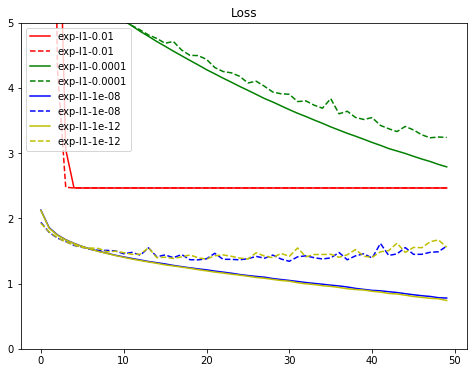

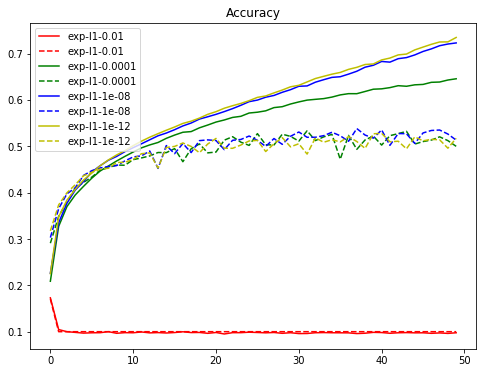

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()